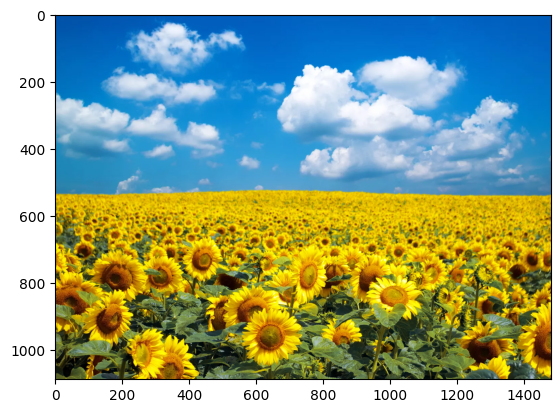

In [131]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

# reading image in and displaying it 
img = cv2.imread("./Input.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [132]:
# Code to plot image + its RGB histogram. Input the figure size, the title of the image, the position of the image, the title 
# of the histogram, position of the histogram, and then the image. 
def plotHistogram(figsize, titleimg, pos1, titlehist, pos2, img, leg1, leg2, leg3, legpos, mask):
    plt.figure(figsize=(figsize[0],figsize[1]))
    plt.subplot(1, 2, pos1)
    plt.title(titleimg)
    plt.imshow(img)
    
    plt.subplot(1, 2, pos2)
    plt.title(titlehist)

    hist = cv2.calcHist([img],[0],mask,[256],[0,255])
    plt.plot(hist, color='red')
    plt.xlim([0,255])

    # green channel.
    hist = cv2.calcHist([img],[1],mask,[256],[0,255])
    plt.plot(hist, color='green')
    plt.xlim([0,255])

    # blue channel.
    hist = cv2.calcHist([img],[2],mask,[256],[0,255])
    plt.plot(hist, color='blue')

    plt.xlim([0,255])

    plt.legend((leg1, leg2, leg3), loc = legpos)
    plt.tight_layout()
    plt.show()

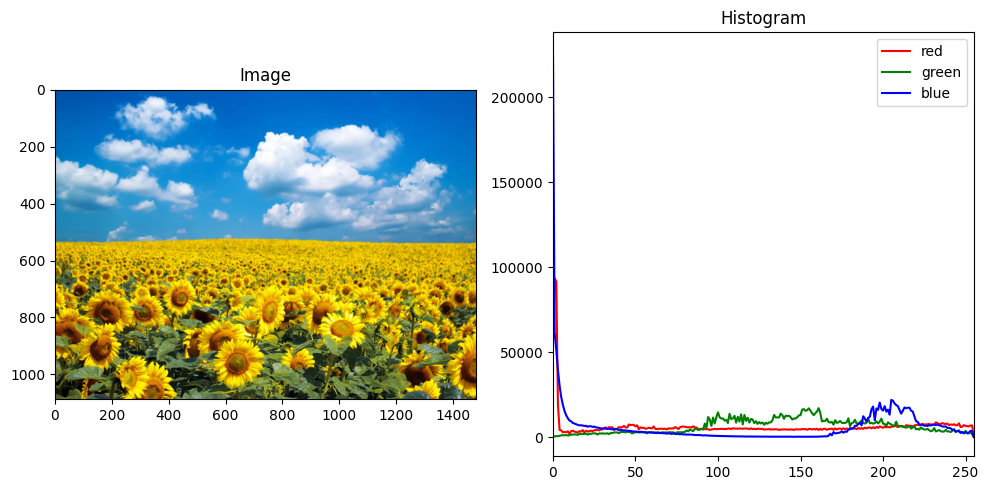

In [133]:
plotHistogram([10, 5], "Image", 1, "Histogram", 2, img, "red", "green", "blue", "upper right", None)

In [134]:
# Code for gamma correction
def gamma_correction(img, gamma):
    # normalize image to [0, 1] + apply gamma correction + scale back to [0, 255]
    corrected = 255.0 * (img / 255.0) ** gamma
    return np.uint8(corrected)

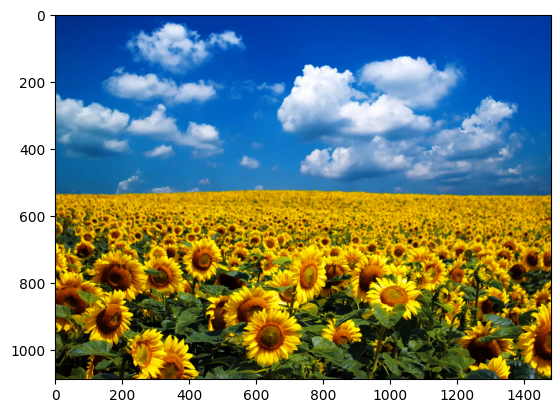

In [135]:
gamma = 1.5 # Gamma value >1 for higher contrast 
corrected_image = gamma_correction(img, gamma) # Displaying corrected image 
plt.imshow(corrected_image)

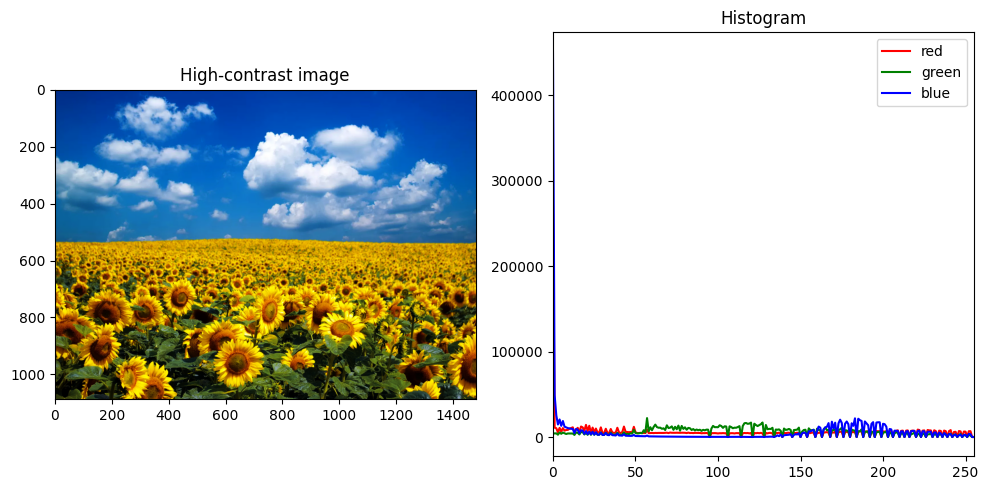

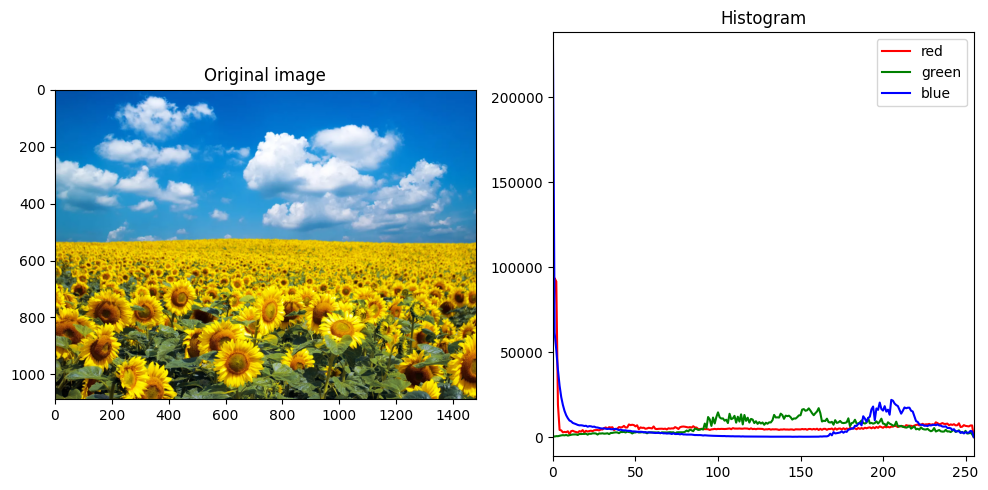

In [136]:
plotHistogram([10, 5], "High-contrast image", 1, "Histogram", 2, corrected_image, "red", "green", "blue", "upper right", None) 
plotHistogram([10, 5], "Original image", 1, "Histogram", 2, img, "red", "green", "blue", "upper right", None)

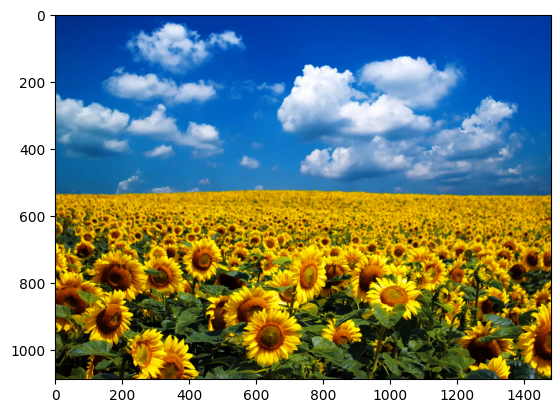

In [137]:
img = corrected_image # Setting corrected image back equal to img 
plt.imshow(img)

In [138]:
print(img.shape)

(1087, 1480, 3)


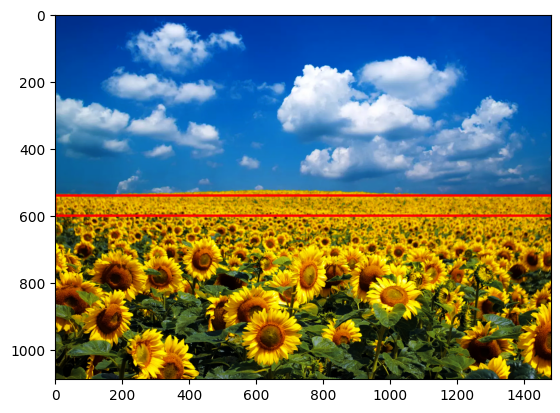

In [139]:
tl = (0, 540) # top left 
br = (1480, 600) # bottom right 
rc = (255, 0, 0) # rectangle color 
thickness = 5 # thickness 
rect = cv2.rectangle(corrected_image, tl, br, rc, thickness)
plt.imshow(rect)

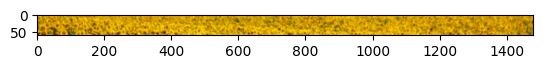

In [140]:
# Reload in image 
img = cv2.imread("./Input.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

img = gamma_correction(img, gamma) # Displaying corrected image 
masked = img[540:600, 0:1480] # Creating masked image
plt.imshow(masked)

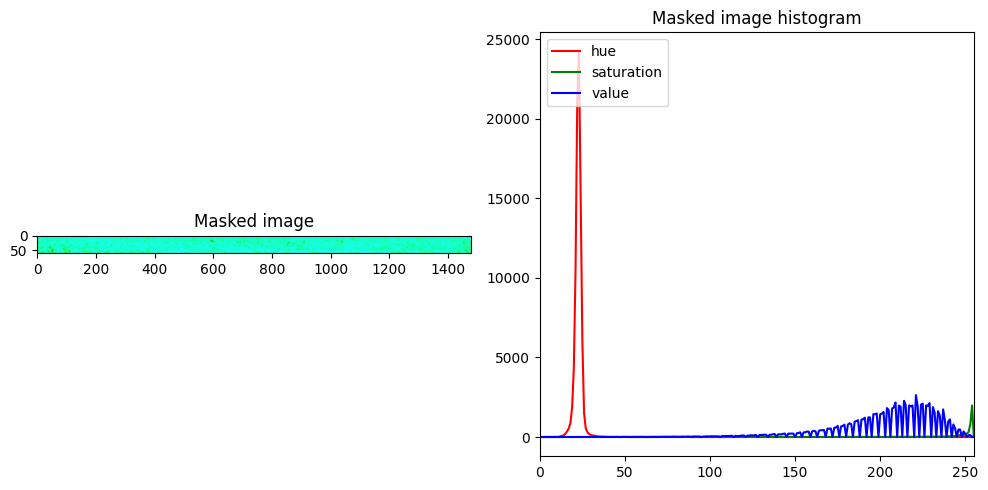

In [141]:
masked = cv2.cvtColor(masked, cv2.COLOR_RGB2HSV)
plotHistogram([10, 5], "Masked image", 1, "Masked image histogram", 2, masked, "hue", "saturation", "value", "upper left", None)

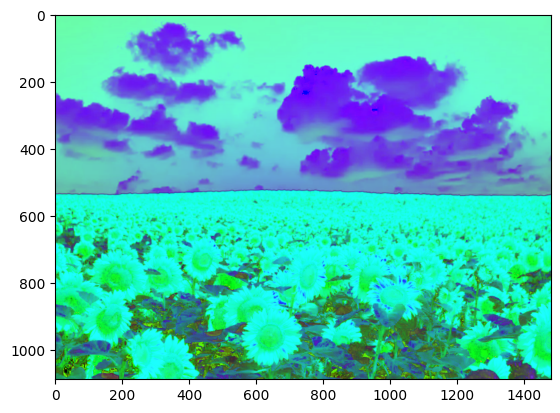

In [142]:
img = cv2.imread("Input.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

plt.imshow(img)

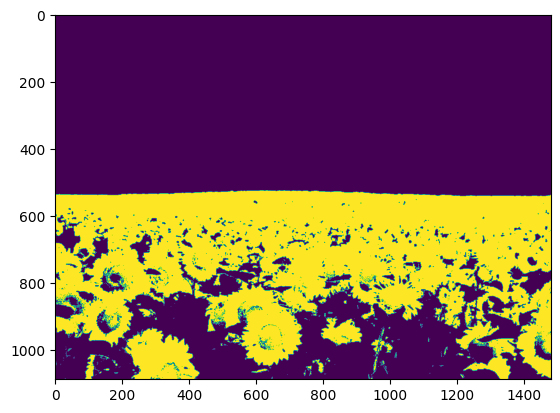

In [174]:
lb = np.uint8([10,200, 70]) 
ub = np.uint8([50,255,255]) 
flowerMask = cv2.inRange(img, lb, ub)
plt.imshow(flowerMask)

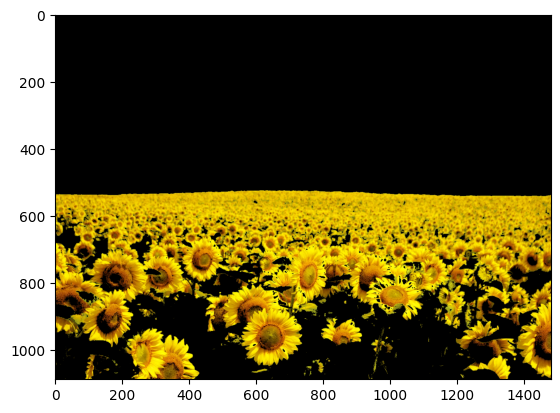

In [175]:

final = cv2.bitwise_and(img, img, mask=flowerMask)
final = cv2.cvtColor(final, cv2.COLOR_HSV2RGB)
plt.imshow(final)